In [26]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## shp 파일 시각화

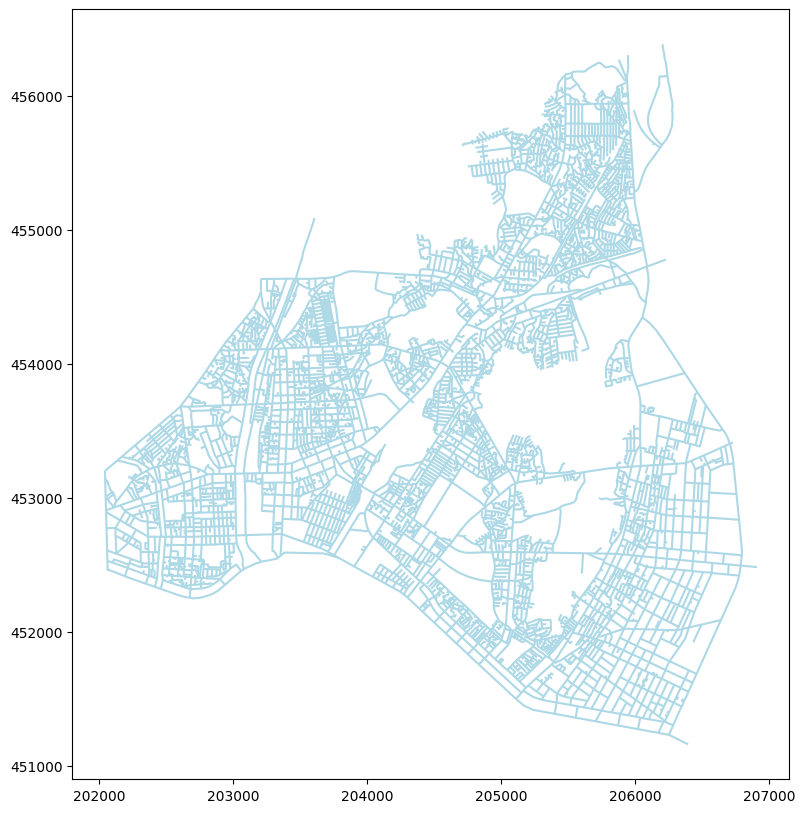

In [27]:
# Shapefile 읽기
dir_path ="/content/drive/MyDrive/2024-02-machine-learning/data/geolocation_data"
file_name = "TL_SPRD_MANAGE.shp"
dongdaemun_map = gpd.read_file(f"{dir_path}/{file_name}")

# Shapefile에서 동대문구 필터링
filtered_map = dongdaemun_map[dongdaemun_map['SIG_CD'] == '11230']

# 데이터 시각화
fig, ax = plt.subplots(figsize=(10, 10))
filtered_map.plot(ax=ax, edgecolor='black', color='lightblue')
plt.show()

## 안전 비상벨

In [28]:
# 비상벨 데이터 읽기
dir_path = "/content/drive/MyDrive/bigdata/dataset"
file_name = "안전비상벨위치정보.xlsx"
emergency_bell = pd.read_excel(f"{dir_path}/{file_name}")

In [29]:
emergency_bell.head()

,번호,안전비상벨관리번호,설치목적,설치장소유형,설치위치,소재지도로명주소,소재지지번주소,WGS84위도,WGS84경도,연계방식,경찰연계유무,경비업체연계유무,관리사무소연계유무,부가기능,안전비상벨설치연도,최종점검일자,최종점검결과구분,관리기관명,관리기관전화번호,데이터기준일자
0,1,HK2_C070,방범용,가로변,-,NaN,서울특별시 동대문구 휘경동 294-198,37.585855,127.060871,양방향,N,N,N,CCTV,2022,2024-06-30,Y,동대문구청 스마트도시과,02-2127-4098,2024-06-30
1,2,HK2_C069,방범용,가로변,-,NaN,서울특별시 동대문구 휘경동 294-317,37.585561,127.060906,양방향,N,N,N,CCTV,2022,2024-06-30,Y,동대문구청 스마트도시과,02-2127-4098,2024-06-30
2,3,HK2_C068,방범용,가로변,-,NaN,서울특별시 동대문구 휘경동 28-30,37.590665,127.064780,양방향,N,N,N,CCTV,2021,2024-06-30,Y,동대문구청 스마트도시과,02-2127-4098,2024-06-30
3,4,HK2_C067,방범용,가로변,-,NaN,서울특별시 동대문구 휘경동 286-114,37.587492,127.060462,양방향,N,N,N,CCTV,2021,2024-06-30,Y,동대문구청 스마트도시과,02-2127-4098,2024-06-30
4,5,HK2_C066,방범용,가로변,-,NaN,서울특별시 동대문구 휘경동 281-26,37.588374,127.058395,양방향,N,N,N,CCTV,2020,2024-06-30,Y,동대문구청 스마트도시과,02-2127-4098,2024-06-30


In [30]:
emergency_bell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   번호         1011 non-null   int64  
 1   안전비상벨관리번호  1011 non-null   object 
 2   설치목적       1011 non-null   object 
 3   설치장소유형     1011 non-null   object 
 4   설치위치       1011 non-null   object 
 5   소재지도로명주소   833 non-null    object 
 6   소재지지번주소    1011 non-null   object 
 7   WGS84위도    1011 non-null   float64
 8   WGS84경도    1011 non-null   float64
 9   연계방식       1011 non-null   object 
 10  경찰연계유무     1011 non-null   object 
 11  경비업체연계유무   1011 non-null   object 
 12  관리사무소연계유무  1011 non-null   object 
 13  부가기능       1011 non-null   object 
 14  안전비상벨설치연도  1011 non-null   int64  
 15  최종점검일자     1011 non-null   object 
 16  최종점검결과구분   1011 non-null   object 
 17  관리기관명      1011 non-null   object 
 18  관리기관전화번호   1011 non-null   object 
 19  데이터기준일자    1011 non-null   object 
dtypes: float

In [31]:
emergency_bell = emergency_bell[
    (emergency_bell['설치목적'] == '방범용') &  # 설치목적이 '방범용'인 데이터
    emergency_bell['소재지도로명주소'].notnull() &  # 소재지도로명주소가 null이 아닌 데이터
    emergency_bell['소재지지번주소'].notnull()  # 소재지지번주소가 null이 아닌 데이터
]

In [32]:
# 필요한 칼럼만 선택하고 칼럼 이름 변경
emergency_bell = emergency_bell[['WGS84위도', 'WGS84경도']].rename(columns={'WGS84경도': 'x', 'WGS84위도': 'y'})

In [33]:
print(emergency_bell)

              y           x
5     37.589079  127.059094
6     37.586571  127.066282
7     37.586290  127.058429
8     37.582692  127.068729
9     37.590016  127.068224
...         ...         ...
1006  37.573300  127.061200
1007  37.575000  127.062200
1008  37.573800  127.064700
1009  37.589400  127.054000
1010  37.592900  127.068900

[809 rows x 2 columns]


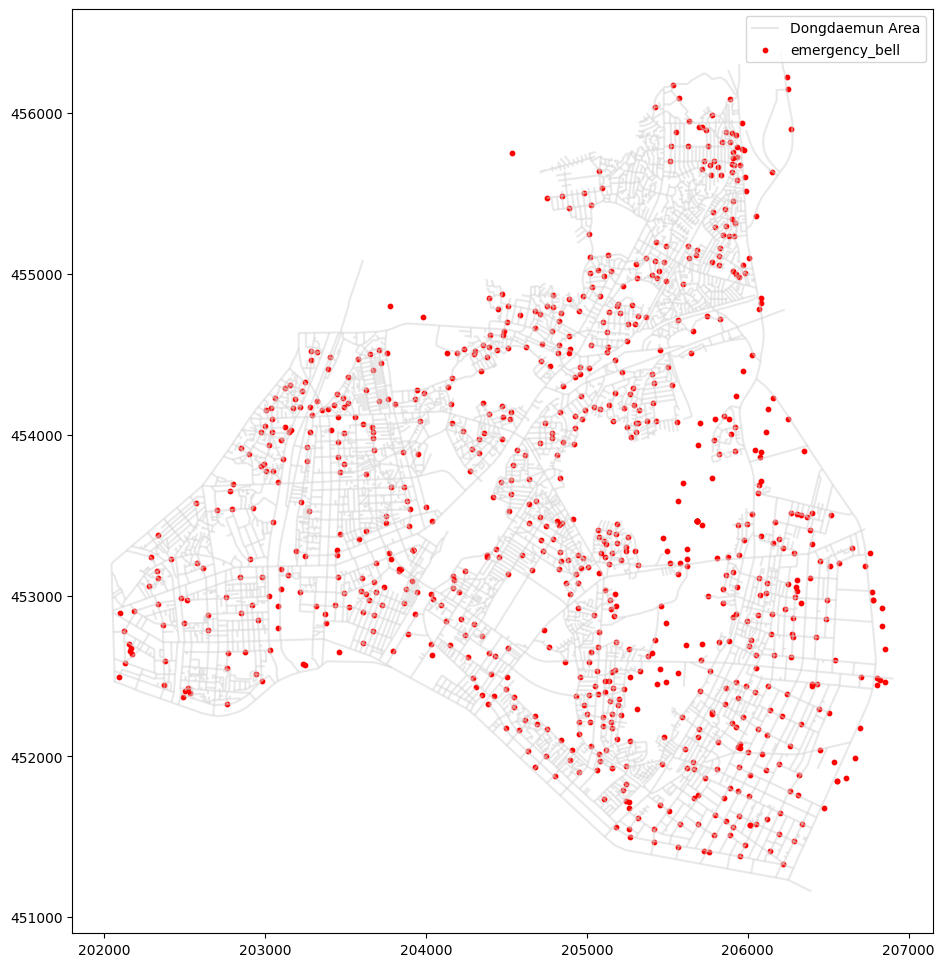

In [34]:
# 단란주점 데이터를 GeoDataFrame으로 변환 (EPSG:4326)
geometry = [Point(xy) for xy in zip(emergency_bell['x'], emergency_bell['y'])]
emergency_bell_geo = gpd.GeoDataFrame(emergency_bell, geometry=geometry, crs="WGS84")

# 유흥주점 데이터를 Shapefile 좌표계(EPSG:5181)로 변환
emergency_bell_geo = emergency_bell_geo.to_crs(filtered_map.crs)

# 동대문구 지도와 유흥주점 데이터를 함께 시각화
fig, ax = plt.subplots(figsize=(12, 12))
filtered_map.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5, label='Dongdaemun Area')
emergency_bell_geo.plot(ax=ax, color='red', markersize=10, label='emergency_bell')
plt.legend()
plt.show()

In [35]:
output_path = "/content/drive/MyDrive/bigdata/dataset/전처리 완료/안전비상벨.csv"
emergency_bell.to_csv(output_path, index=False, encoding='utf-8-sig')